# Mini Project
## IA 340-2
#### Andre Danos

##### Preface Code

In [12]:
import boto3
from botocore.exceptions import ClientError
import json

def get_secret(secret_name):
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e

    secret = get_secret_value_response['SecretString']
    
    return json.loads(secret)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("s3://ia-340-2-fall25147258/HTLN_WhiteTailedDeer_SamplingEvents.csv")
df.head()

,EventID,PeriodID,ParkCode,Route,SurveyNumber,Round,DeerDate,StartTime,BeginningTemperatureInCelsius,BeginningHumidityInPercent,...,EndingPrecipitation,MoonIlluminationInPercent,DeerTotal,BeginningCloudCoverInPercent,EndingCloudCoverInPercent,FieldNotes,Type,BasisofRecord,ScientificName,TaxonRank
0,ARPODeerSV2005Mar281923,ARPODeerSV2005Mar28,ARPO,Tour Road,1,A,2005-03-28,19:23:00,15.3,60.9,...,No rain,94,22,None present,None present,NaN,Event,HumanObservation,Odocoileus virginianus,Species
1,ARPODeerSV2005Mar282023,ARPODeerSV2005Mar28,ARPO,Tour Road,1,B,2005-03-28,20:23:00,13.6,73.6,...,No rain,94,19,None present,None present,NaN,Event,HumanObservation,Odocoileus virginianus,Species
2,ARPODeerSV2005Mar282123,ARPODeerSV2005Mar28,ARPO,Tour Road,1,C,2005-03-28,21:23:00,13.1,74.5,...,No rain,94,31,None present,None present,NaN,Event,HumanObservation,Odocoileus virginianus,Species
3,ARPODeerSV2005Mar291030,ARPODeerSV2005Mar28,ARPO,Tour Road,2,DayA,2005-03-29,10:30:00,19.0,53.7,...,No rain,0,7,5 - 25,5 - 25,NaN,Event,HumanObservation,Odocoileus virginianus,Species
4,ARPODeerSV2005Mar291130,ARPODeerSV2005Mar28,ARPO,Tour Road,2,DayB,2005-03-29,11:30:00,20.7,49.0,...,No rain,0,0,5 - 25,5 - 25,No deer,Event,HumanObservation,Odocoileus virginianus,Species


In [14]:
df.shape

(677, 28)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677 entries, 0 to 676
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   EventID                          677 non-null    object 
 1   PeriodID                         677 non-null    object 
 2   ParkCode                         677 non-null    object 
 3   Route                            677 non-null    object 
 4   SurveyNumber                     677 non-null    int64  
 5   Round                            677 non-null    object 
 6   DeerDate                         677 non-null    object 
 7   StartTime                        677 non-null    object 
 8   BeginningTemperatureInCelsius    677 non-null    float64
 9   BeginningHumidityInPercent       677 non-null    float64
 10  BeginningWindInMetersPerSecond   677 non-null    float64
 11  BeginningWindDirectionInDegrees  677 non-null    int64  
 12  BeginningPrecipitation

In [16]:
df.isnull().sum()

EventID                              0
PeriodID                             0
ParkCode                             0
Route                                0
SurveyNumber                         0
Round                                0
DeerDate                             0
StartTime                            0
BeginningTemperatureInCelsius        0
BeginningHumidityInPercent           0
BeginningWindInMetersPerSecond       0
BeginningWindDirectionInDegrees      0
BeginningPrecipitation               0
EndTime                              0
EndingTemperatureInCelsius           0
EndingHumidityInPercent              0
EndingWindInMetersPerSecond          0
EndingWindDirectionInDegrees         0
EndingPrecipitation                  0
MoonIlluminationInPercent            0
DeerTotal                            0
BeginningCloudCoverInPercent         0
EndingCloudCoverInPercent            0
FieldNotes                         624
Type                                 0
BasisofRecord            

In [17]:
df = df.drop(columns=["FieldNotes", "BeginningWindInMetersPerSecond", "EndingWindInMetersPerSecond", "BeginningWindDirectionInDegrees", "EndingWindDirectionInDegrees", "BeginningHumidityInPercent", "EndingHumidityInPercent","Route","Type","BasisofRecord","ScientificName","TaxonRank","BeginningCloudCoverInPercent","EndingCloudCoverInPercent"], errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677 entries, 0 to 676
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   EventID                        677 non-null    object 
 1   PeriodID                       677 non-null    object 
 2   ParkCode                       677 non-null    object 
 3   SurveyNumber                   677 non-null    int64  
 4   Round                          677 non-null    object 
 5   DeerDate                       677 non-null    object 
 6   StartTime                      677 non-null    object 
 7   BeginningTemperatureInCelsius  677 non-null    float64
 8   BeginningPrecipitation         677 non-null    object 
 9   EndTime                        677 non-null    object 
 10  EndingTemperatureInCelsius     677 non-null    float64
 11  EndingPrecipitation            677 non-null    object 
 12  MoonIlluminationInPercent      677 non-null    int

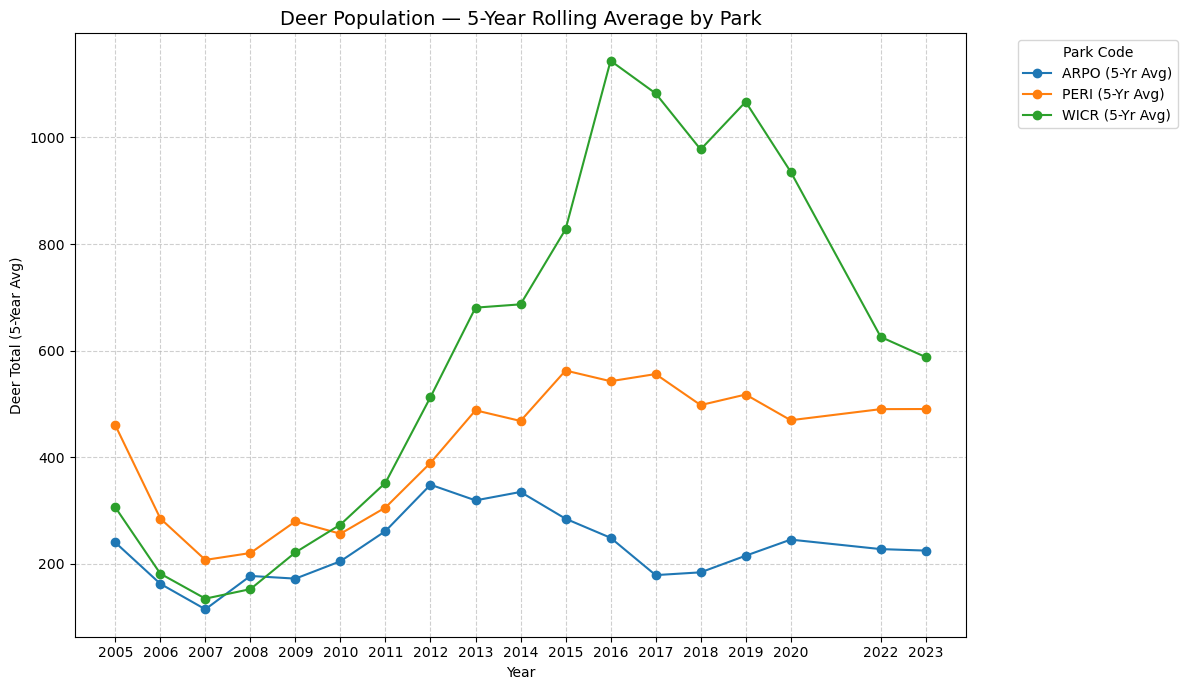

In [29]:
df['Year'] = df['DeerDate'].dt.year

yearly = df.groupby(['ParkCode', 'Year'], as_index=False)['DeerTotal'].sum()

yearly['DeerTotal_5yrAvg'] = (
    yearly.groupby('ParkCode')['DeerTotal']
    .transform(lambda x: x.rolling(window=5, min_periods=1).mean())
)

plt.figure(figsize=(12, 7))

for park, park_df in yearly.groupby('ParkCode'):
    plt.plot(
        park_df['Year'],
        park_df['DeerTotal_5yrAvg'],
        marker='o',
        label=f'{park} (5-Yr Avg)'
    )

plt.title('Deer Population — 5-Year Rolling Average by Park', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Deer Total (5-Year Avg)')
plt.legend(title='Park Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.xticks(sorted(yearly['Year'].unique().astype(int)))
plt.show()
